In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification

In [17]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [21]:
data['Embarked']=data['Embarked'].fillna('S')
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
data['Cabin']=data['Cabin'].fillna('G6')
data['Cabin']

0        G6
1       C85
2        G6
3      C123
4        G6
       ... 
886      G6
887     B42
888      G6
889    C148
890      G6
Name: Cabin, Length: 891, dtype: object

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [25]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(columns=columns_to_drop)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Binary encode 'Sex'
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# One-Hot encode 'Embarked' and 'Pclass'
data = pd.get_dummies(data, columns=['Embarked', 'Pclass'], drop_first=True)

In [27]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [30]:
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [31]:
X.shape, y.shape

((100, 1), (100,))

In [32]:
# Fit the classifier
clf = LogisticRegression(C=10000)
clf.fit(X, y)

LogisticRegression(C=10000)

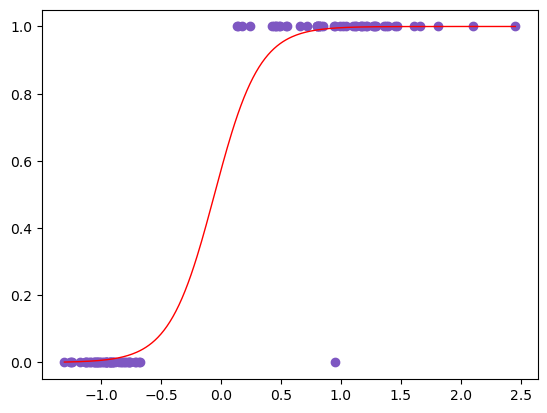

In [44]:
plt.scatter(X.ravel(), y, color="#7E57C2")

X_test = np.linspace(X.min(), X.max(), 300)
proba = clf.predict_proba(X_test.reshape((-1, 1)))[:,1]
plt.plot(X_test, proba, label="Logistic Regression Model", color="red", linewidth=1)

In [34]:
ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

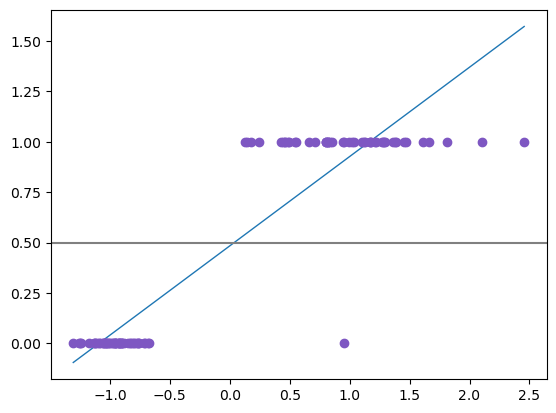

In [42]:
plt.scatter(X.ravel(), y, label="example data", color="#7E57C2", zorder=20)

plt.plot(
    X_test,
    ols.predict(X_test.reshape((-1, 1))),
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

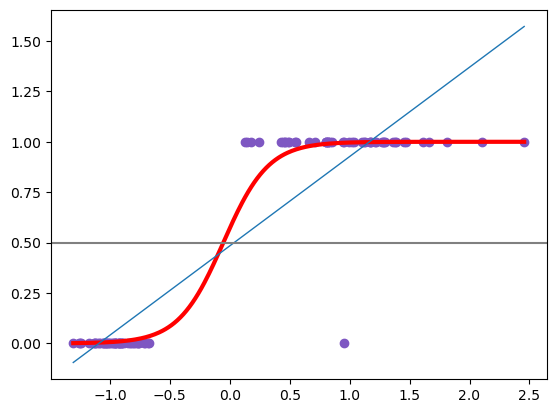

In [43]:
plt.scatter(X.ravel(), y, color="#7E57C2")

X_test = np.linspace(X.min(), X.max(), 300)
proba = clf.predict_proba(X_test.reshape((-1, 1)))[:,1]
plt.plot(X_test, proba, label="Logistic Regression Model", color="red", linewidth=3)

plt.plot(
    X_test,
    ols.predict(X_test.reshape((-1, 1))),
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")